<a href="https://colab.research.google.com/github/mr-zulme/Project-1-Perceptron/blob/master/Email_Spam_Detacation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [9]:
df=pd.read_csv('spam.csv',encoding='latin-1')


In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
#Data Cleanining
#Eda
#Text Preprocessing
#model Bulding
#Evaluation
#Improvement 
#Website

In [13]:
#Data Cleaning


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.sample(5)

,v1,v2
761,ham,"We are at grandmas. Oh dear, u still ill? I fe..."
5526,spam,PRIVATE! Your 2003 Account Statement for shows...
1006,spam,Panasonic & BluetoothHdset FREE. Nokia FREE. M...
3460,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
2874,ham,"Idk. You keep saying that you're not, but sinc..."


In [18]:
#Renaming The columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [19]:
df.sample(5)

,Target,Text
4587,ham,I wanted to wish you a Happy New Year and I wa...
522,ham,Were gonna go get some tacos
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
1283,ham,Yes i thought so. Thanks.
1916,ham,Fffff. Can you text kadeem or are you too far ...


In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [22]:
df['Target']=encoder.fit_transform(df['Target'])

In [23]:
df.sample(2)

,Target,Text
3544,0,Thank You meet you monday
2385,1,Someone has contacted our dating service and e...


In [24]:
#Missing Values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [25]:
#check for duplicate values
df.duplicated().sum()

403

In [26]:
df=df.drop_duplicates(keep='first')

In [27]:
df.duplicated().sum()

0

In [28]:
df.shape

(5169, 2)

In [29]:
##EDA

In [30]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f87fe2c5ae0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

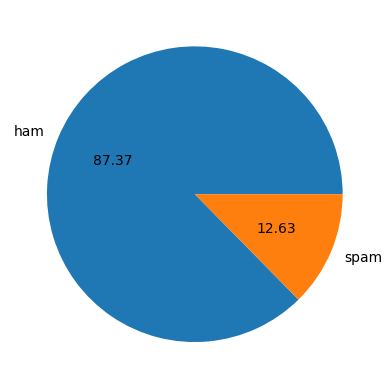

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

Data is Imbalaanced

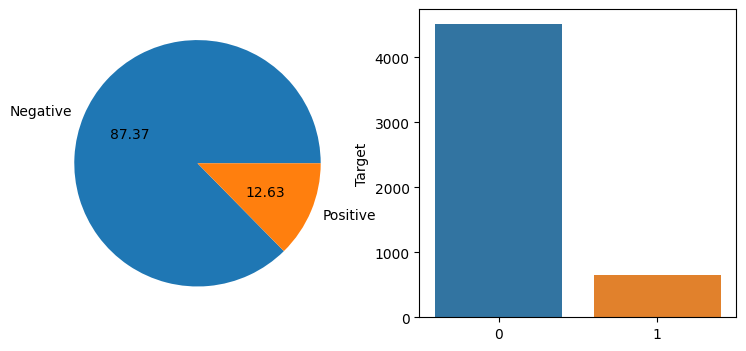

In [35]:
import seaborn as sns
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['Target'].value_counts(),labels=['Negative','Positive'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['Target'].value_counts().index,y=df['Target'].value_counts(),data=df)
plt.show()

In [36]:
import nltk

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
df['num_char']=df['Text'].apply(len)

In [40]:
df.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
#num of Words
df['num_words ']=df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [44]:
df.sample(3)

,Target,Text,num_char,num_words
3855,0,I'm ok. Will do my part tomorrow,32,8
2129,0,Mine here like all fr china then so noisy.,42,10
1422,1,Congratulations ur awarded either å£500 of CD ...,152,25


In [45]:
#no of Sentences
df['num_sent ']=df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [51]:
df.sample(3)

,Target,Text,num_char,num_words,num_sent
1246,0,"I do know what u mean, is the king of not hav...",111,27,4
4531,0,Ok both our days. So what are you making for d...,73,18,3
4106,1,HOT LIVE FANTASIES call now 08707500020 Just 2...,122,25,1


In [53]:
df[['num_char','num_words ','num_sent ']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [56]:
#Describe for Ham
df[df['Target']==0][['num_char','num_words ','num_sent ']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#Describe for Spam
df[df['Target']==1][['num_char','num_words ','num_sent ']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

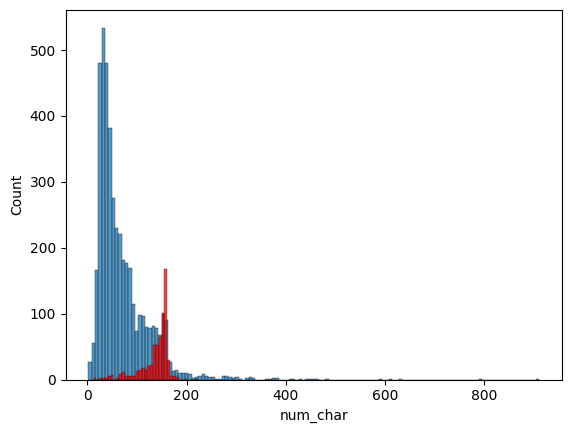

In [68]:
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='red')

Spam Massages High high No of Characters as compare to Ham Massages:

<Axes: xlabel='num_words ', ylabel='Count'>

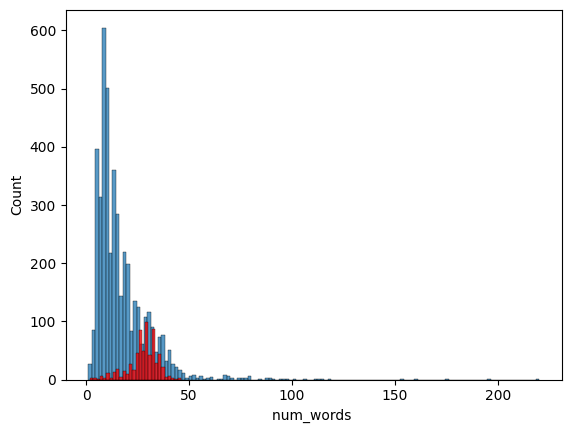

In [69]:
sns.histplot(df[df['Target']==0]['num_words '])
sns.histplot(df[df['Target']==1]['num_words '],color='red')

Same For Wods also Spam massages have high numbers of words as Compare to Ham Massages

<Axes: xlabel='num_sent ', ylabel='Count'>

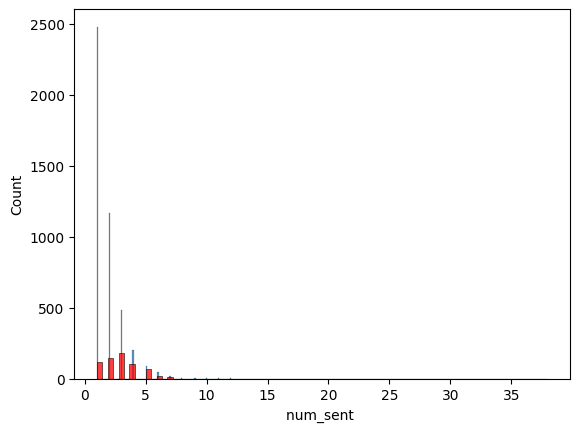

In [70]:
sns.histplot(df[df['Target']==0]['num_sent '])
sns.histplot(df[df['Target']==1]['num_sent '],color='red')

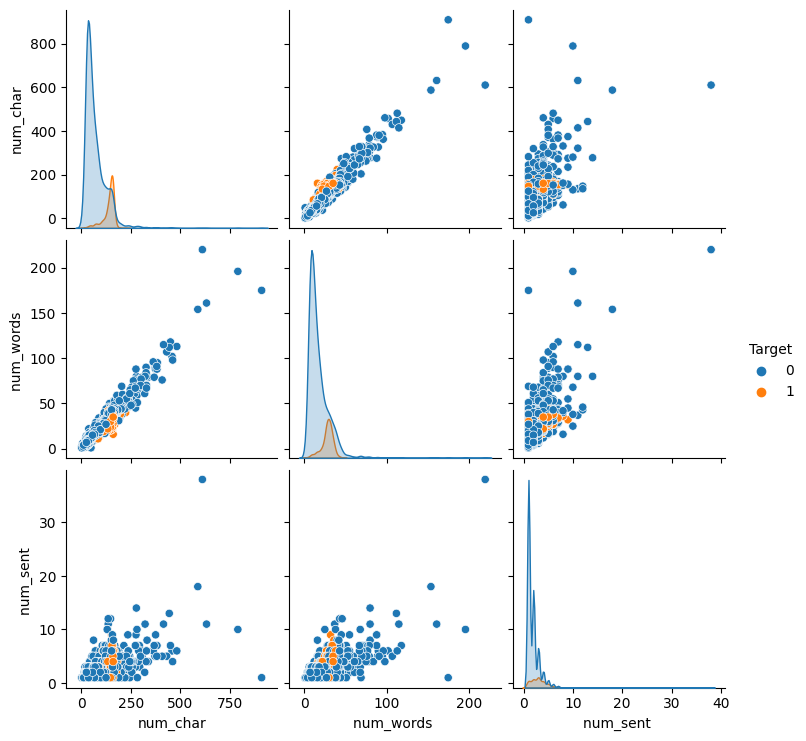

In [71]:
sns.pairplot(df,hue='Target')

<ipython-input-75-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

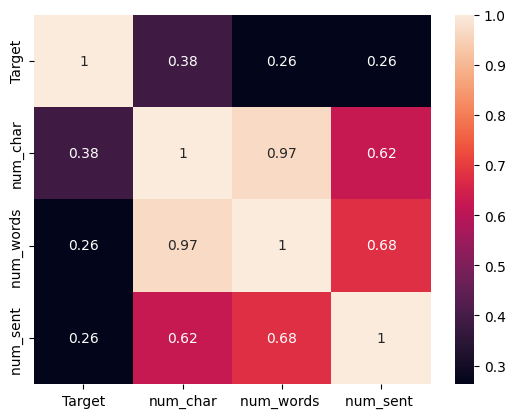

In [75]:
sns.heatmap(df.corr(),annot=True)

We have Keep Only one column because there is high correlation between independent columns
(num_char,num_words,num_sent )
 we keep num_char column because it give a good correlation with target Column

## Data Preprocessing


*  Lower Case
*  Tokenization
*  Removing Special characters
*  Removing stop words and Panctuations
*  Seeaming












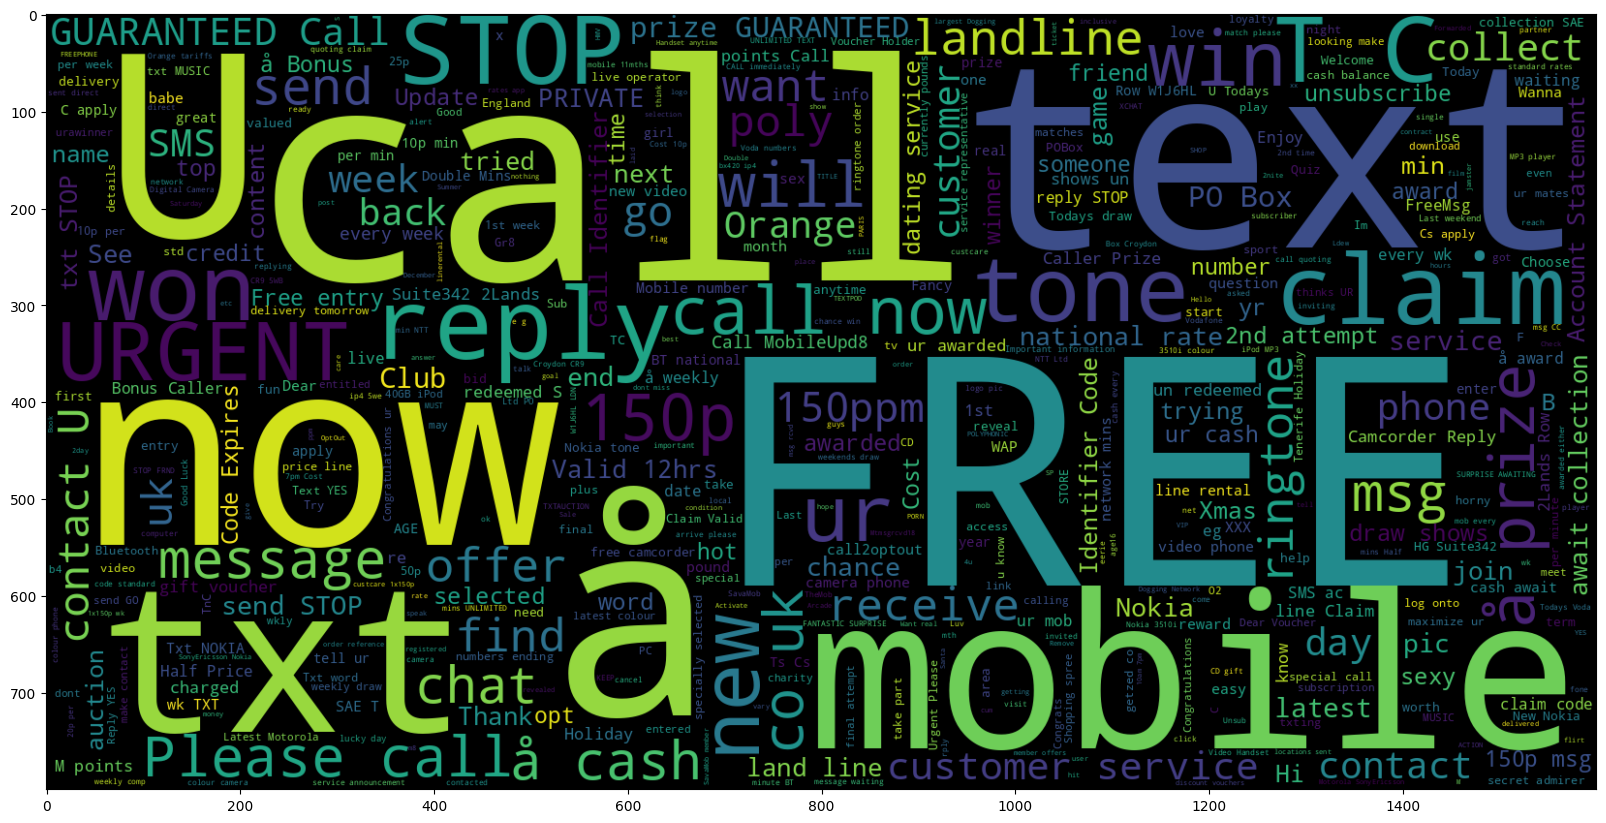

In [66]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(df[df.Target == 1].Text))
plt.imshow(wc , interpolation = 'bilinear')